In [3]:
from numpy import *

In [1]:
def loadSimpData():
    datMat = matrix([[1., 2.1],
                    [2., 1.1],
                    [1.3, 1.],
                    [1., 1.],
                    [2., 1.]])
    classLabels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return datMat, classLabels

In [4]:
datMat, classLabels = loadSimpData()

In [5]:
# 通过阈值比较对数据进行分类
# 所有在阈值一边的数据会分到类别 -1，而在另外一边的数据分到类别 +1
# 参数：训练矩阵，特征下标，阈值，标记
def stumpClassify(dataMatrix, dimen, threshVal, threshIneq):
    retArray = ones((shape(dataMatrix)[0], 1))
    if threshIneq == 'It':
        retArray[dataMatrix[:, dimen] <= threshVal] = -1.0
    else:
        retArray[dataMatrix[:, dimen] > threshVal] = -1.0
    return retArray

def buildStump(dataArr, classLabels, D):
    dataMatrix = mat(dataArr)
    labelMat = mat(classLabels).T
    m, n = shape(dataMatrix)
    
    numSteps = 10.0  # 特征属性的最大值（用于遍历每一个特征的所有可能值）
    bestStump = {}
    bestClasEst = mat(zeros((m, 1)))
    minError = inf
    for i in range(n):  # 遍历每一个特征
        rangeMin = dataMatrix[:, i].min()  # 第i个特征的最小值
        rangeMax = dataMatrix[:, i].max()  # 第i个特征的最大值
        stepSize = (rangeMax - rangeMin) / numSteps  # 步长
        for j in range(-1, int(numSteps)+1):  # 每个特征的可能值
            for inequal in ['It', 'gt']:
                threshVal = (rangeMin + float(j) * stepSize)
                predictedVals = stumpClassify(dataMatrix, i, threshVal, inequal)
                
                errArr = mat(ones((m, 1)))
                errArr[predictedVals == labelMat] = 0
                weightedError = D.T * errArr
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump, minError, bestClasEst

In [6]:
D = mat(ones((5, 1)) / 5)  # 初始概率相等
D

matrix([[0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.2]])

In [7]:
buildStump(datMat, classLabels, D)

({'dim': 0, 'thresh': 1.3, 'ineq': 'It'}, matrix([[0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

In [53]:
# 参数：数据集，类别标签，迭代次数
def adaBoostTrainDS(dataArr, classLabels, numIt=40):
    weakClassArr = []
    m = shape(dataArr)[0]
    D = mat(ones((m, 1)) / m)  # 初始概率相等
    aggClassEst = mat(zeros((m, 1)))  # 记录每个数据点的类别估计累计值
    for i in range(numIt):
        bestStump, error, classEst = buildStump(dataArr, classLabels, D)
        print('D: ', D.T)
        
        alpha = float(0.5 * log((1.0 - error) / max(error, 1e-16))) # 更新权重值
        bestStump['alpha'] = alpha
        
        weakClassArr.append(bestStump)
        print('classEst: ', classEst.T)
        
        # 更新概率
        expon = multiply(-1 * alpha * mat(classLabels).T, classEst)
        D = multiply(D, exp(expon))
        D = D / D.sum()
        
        aggClassEst += alpha * classEst
        print('aggClassEst: ', aggClassEst.T)
        
        # sign：正数返回1，负数返回-1，0返回0
        # 最后乘以1是为了将布尔转换为数字，multiply是对应位置相乘
        aggClassEst = multiply(sign(aggClassEst) != mat(classLabels).T, ones((m, 1)))
        errorRate = aggClassEst.sum() / m
        print('total error: ', errorRate)
        
        if errorRate == 0.0:
            break
    return weakClassArr

In [54]:
classifierArray = adaBoostTrainDS(datMat, classLabels, 9)
classifierArray

D:  [[0.2 0.2 0.2 0.2 0.2]]
classEst:  [[-1.  1. -1. -1.  1.]]
aggClassEst:  [[-0.69314718  0.69314718 -0.69314718 -0.69314718  0.69314718]]
total error:  0.2
D:  [[0.5   0.125 0.125 0.125 0.125]]
classEst:  [[ 1.  1. -1. -1. -1.]]
aggClassEst:  [[ 1.97295507  0.97295507 -0.97295507 -0.97295507 -0.97295507]]
total error:  0.2
D:  [[0.28571429 0.07142857 0.07142857 0.07142857 0.5       ]]
classEst:  [[1. 1. 1. 1. 1.]]
aggClassEst:  [[0.89587973 0.89587973 0.89587973 0.89587973 1.89587973]]
total error:  0.4
D:  [[0.16666667 0.04166667 0.25       0.25       0.29166667]]
classEst:  [[-1.  1. -1. -1.  1.]]
aggClassEst:  [[-0.80471896  0.80471896  0.19528104  0.19528104  0.80471896]]
total error:  0.6
D:  [[0.5   0.025 0.15  0.15  0.175]]
classEst:  [[ 1.  1. -1. -1. -1.]]
aggClassEst:  [[ 1.77529871  0.77529871  0.22470129  0.22470129 -0.77529871]]
total error:  0.6
D:  [[0.3030303  0.01515152 0.09090909 0.09090909 0.5       ]]
classEst:  [[1. 1. 1. 1. 1.]]
aggClassEst:  [[0.7520387 0.7520

[{'dim': 0, 'thresh': 1.3, 'ineq': 'It', 'alpha': 0.6931471805599453},
 {'dim': 1, 'thresh': 1.0, 'ineq': 'It', 'alpha': 0.9729550745276565},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'It', 'alpha': 0.8958797346140273},
 {'dim': 0, 'thresh': 1.3, 'ineq': 'It', 'alpha': 0.8047189562170499},
 {'dim': 1, 'thresh': 1.0, 'ineq': 'It', 'alpha': 0.7752987062055835},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'It', 'alpha': 0.752038698388137},
 {'dim': 0, 'thresh': 1.3, 'ineq': 'It', 'alpha': 0.7408022704621077},
 {'dim': 1, 'thresh': 1.0, 'ineq': 'It', 'alpha': 0.7331685343967135},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'It', 'alpha': 0.7288766625510178}]

## 测试

In [55]:
# 参数：多个待分类样例，多个弱分类器数组
def adaClassify(datToClass, classifierArr):
    dataMatrix = mat(datToClass)
    m = shape(dataMatrix)[0]
    aggClassEst = mat(zeros((m, 1)))
    for i in range(len(classifierArr)):
        classEst = stumpClassify(dataMatrix, classifierArr[i]['dim'],
                                classifierArr[i]['thresh'],
                                classifierArr[i]['ineq'])
        aggClassEst += classifierArr[i]['alpha'] * classEst
        print(aggClassEst)
    return sign(aggClassEst)

In [57]:
datArr, labelArr = loadSimpData()
classifierArr = adaBoostTrainDS(datArr, labelArr, 30)
adaClassify([0, 0], classifierArr)

D:  [[0.2 0.2 0.2 0.2 0.2]]
classEst:  [[-1.  1. -1. -1.  1.]]
aggClassEst:  [[-0.69314718  0.69314718 -0.69314718 -0.69314718  0.69314718]]
total error:  0.2
D:  [[0.5   0.125 0.125 0.125 0.125]]
classEst:  [[ 1.  1. -1. -1. -1.]]
aggClassEst:  [[ 1.97295507  0.97295507 -0.97295507 -0.97295507 -0.97295507]]
total error:  0.2
D:  [[0.28571429 0.07142857 0.07142857 0.07142857 0.5       ]]
classEst:  [[1. 1. 1. 1. 1.]]
aggClassEst:  [[0.89587973 0.89587973 0.89587973 0.89587973 1.89587973]]
total error:  0.4
D:  [[0.16666667 0.04166667 0.25       0.25       0.29166667]]
classEst:  [[-1.  1. -1. -1.  1.]]
aggClassEst:  [[-0.80471896  0.80471896  0.19528104  0.19528104  0.80471896]]
total error:  0.6
D:  [[0.5   0.025 0.15  0.15  0.175]]
classEst:  [[ 1.  1. -1. -1. -1.]]
aggClassEst:  [[ 1.77529871  0.77529871  0.22470129  0.22470129 -0.77529871]]
total error:  0.6
D:  [[0.3030303  0.01515152 0.09090909 0.09090909 0.5       ]]
classEst:  [[1. 1. 1. 1. 1.]]
aggClassEst:  [[0.7520387 0.7520

matrix([[-1.]])

In [58]:
adaClassify([[5, 5], [0, 0]], classifierArr)

[[ 0.69314718]
 [-0.69314718]]
[[ 1.66610226]
 [-1.66610226]]
[[ 2.56198199]
 [-2.56198199]]
[[ 3.36670095]
 [-3.36670095]]
[[ 4.14199965]
 [-4.14199965]]
[[ 4.89403835]
 [-4.89403835]]
[[ 5.63484062]
 [-5.63484062]]
[[ 6.36800916]
 [-6.36800916]]
[[ 7.09688582]
 [-7.09688582]]
[[ 7.82301198]
 [-7.82301198]]
[[ 8.5474988]
 [-8.5474988]]
[[ 9.27095829]
 [-9.27095829]]
[[ 9.99379161]
 [-9.99379161]]
[[ 10.71623587]
 [-10.71623587]]
[[ 11.43844096]
 [-11.43844096]]
[[ 12.16049792]
 [-12.16049792]]
[[ 12.88246353]
 [-12.88246353]]
[[ 13.60437264]
 [-13.60437264]]
[[ 14.32624684]
 [-14.32624684]]
[[ 15.04809948]
 [-15.04809948]]
[[ 15.76993878]
 [-15.76993878]]
[[ 16.49176985]
 [-16.49176985]]
[[ 17.21359582]
 [-17.21359582]]
[[ 17.93541865]
 [-17.93541865]]
[[ 18.65723954]
 [-18.65723954]]
[[ 19.37905922]
 [-19.37905922]]
[[ 20.10087816]
 [-20.10087816]]
[[ 20.82269664]
 [-20.82269664]]
[[ 21.54451484]
 [-21.54451484]]
[[ 22.26633286]
 [-22.26633286]]


matrix([[ 1.],
        [-1.]])

# 预测患有疝病的马能否存活

In [59]:
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t'))
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat - 1):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

In [65]:
datArr, labelArr = loadDataSet('horseColicTraining2.txt')
classifierArray = adaBoostTrainDS(datArr, labelArr, 10)

D:  [[0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.0033444

D:  [[0.00264952 0.0106296  0.00152086 0.00667055 0.00240286 0.00152086
  0.00152086 0.00667055 0.00264952 0.00679523 0.00269904 0.00269904
  0.00152086 0.00667055 0.00169377 0.00264952 0.00141823 0.00225997
  0.00269904 0.00504229 0.00679523 0.00152086 0.00152086 0.00169377
  0.00169377 0.00401073 0.00269904 0.00152086 0.0079665  0.00095441
  0.00141823 0.00667055 0.00269904 0.00269904 0.00679523 0.00141823
  0.00448898 0.0079665  0.00152086 0.00448898 0.00141823 0.00401073
  0.00269904 0.00422204 0.00225997 0.00141823 0.01269471 0.00152086
  0.00357061 0.00141823 0.00152086 0.00667055 0.00152086 0.00225997
  0.00357061 0.00667055 0.00225997 0.00264952 0.00251691 0.00141823
  0.00152086 0.00269904 0.00240286 0.00568982 0.00269904 0.00169377
  0.00316426 0.00152086 0.00422204 0.00152086 0.00448898 0.00152086
  0.00448898 0.00251691 0.0079665  0.00667055 0.00095441 0.00095441
  0.00470204 0.00504229 0.00264952 0.00152086 0.00269904 0.00169377
  0.00269904 0.00152086 0.00264952 0.0079665

In [66]:
testArr, testLabelArr = loadDataSet('horseColicTest2.txt')
prediction10 = adaClassify(testArr, classifierArray)

[[ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [-0.46166238]
 [-0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166

In [68]:
errArr = mat(ones((67, 1)))
errArr[prediction10 != mat(testLabelArr).T].sum()

16.0

# ROC曲线的绘制及AUC计算

In [156]:
# 参数：分类器的预测强度（累计权值值），标签
def plotROC(predStrengths, classLabels):
    import matplotlib.pyplot as plt
    cur = (1.0, 1.0)
    ySum = 0.0  # 高度的和
    numPosClas = sum(array(classLabels) == 1.0)  # 分类为1的个数
    yStep = 1 / float(numPosClas)
    xStep = 1 / float(len(classLabels) - numPosClas)  # 矩阵宽度
    sortedIndicies = predStrengths.argsort()  # argsort函数返回的是数组值从小到大的索引值
    
    fig = plt.figure()
    fig.clf()
    ax = plt.subplot(111)
    for index in sortedIndicies.tolist()[0]:  # 将数组或者矩阵转换成列表
        if classLabels[index] == 1.0:
            delX = 0
            delY = yStep
        else:
            delX = xStep
            delY = 0
            ySum += cur[1]
        ax.plot([cur[0], cur[0]-delX], [cur[1], cur[1]-delY], c='b')
        cur = (cur[0] - delX, cur[1] - delY)
        
    ax.plot([0, 1], [0, 1], 'b--')  # 绘制虚线，起始点是[0,0]到[1,1]
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for AdaBoost Horse Colic Detection System')
    ax.axis([0, 1, 0, 1])  # 横坐标范围0~1，纵坐标范围0~1
    plt.show()
    
    print('the Area Under the Curve is: ', ySum * xStep)

In [157]:
# 只修改了最后一行代码
def adaBoostTrainDS(dataArr, classLabels, numIt=40):
    weakClassArr = []
    m = shape(dataArr)[0]
    D = mat(ones((m, 1)) / m)  # 初始概率相等
    aggClassEst = mat(zeros((m, 1)))  # 记录每个数据点的类别估计累计值
    for i in range(numIt):
        bestStump, error, classEst = buildStump(dataArr, classLabels, D)
        
        alpha = float(0.5 * log((1.0 - error) / max(error, 1e-16))) # 更新权重值
        bestStump['alpha'] = alpha
        
        weakClassArr.append(bestStump)
        
        # 更新概率
        expon = multiply(-1 * alpha * mat(classLabels).T, classEst)
        D = multiply(D, exp(expon))
        D = D / D.sum()
        
        aggClassEst += alpha * classEst
        
        # sign：正数返回1，负数返回-1，0返回0
        # 最后乘以1是为了将布尔转换为数字，multiply是对应位置相乘
        aggClassEst = multiply(sign(aggClassEst) != mat(classLabels).T, ones((m, 1)))
        errorRate = aggClassEst.sum() / m
        
        if errorRate == 0.0:
            break
    return weakClassArr, aggClassEst

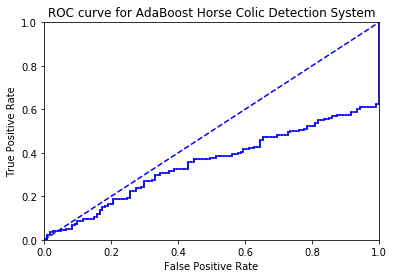

the Area Under the Curve is:  0.3517968242176601


In [158]:
datArr, labelArr = loadDataSet('horseColicTraining2.txt')
classifierArray, aggClassEst = adaBoostTrainDS(datArr, labelArr, 40)
plotROC(aggClassEst.T, labelArr)